This notebook allows you to visualize exploration and exploitation statistics for the Exploration in Malmo Continuous Mountain Cart EMC^2 experiment. make sure your data is in the run_saves/ folder.

In [69]:
from utils.plot_utils import *
from utils.gep_utils import Bounds
import numpy as np
import os
import pylab
import seaborn
import config
import scipy.stats as sp

In [83]:
# Step 1 load data
nb_runs = 2
#model_full_names = ["Random Single Goal Space", "Flat Random Goal Babbling"]#, "Random Model Babbling", "Active Model Babbling"]
model_full_names = ["Flat Random Goal Babbling", "Random Model Babbling", "Active Model Babbling"]
model_filenames = ["emmc3_random","emmc3_f_rgb","emmc3_rmb","emmc3_amb"]
#model_filenames = ["random","dist_fmb","dist_rmb","dist_amb"]
nb_models = len(model_filenames)

saves = {}
stat = {}
for k in model_filenames:
    saves[k] = []
    stat[k] = {}


for filename in model_filenames:
    print(filename)
    for j in range(nb_runs):
        full_filename = "run_saves/"+filename+"_"+str(j)+"_bk.pickle"
        if os.path.isfile(full_filename):
            data = pickle.load(open(full_filename,"rb"))
            saves[filename].append(data)
            nb_episodes = len(data['end_agent_x'])
            print(nb_episodes)

emmc3_random
20000
20000
emmc3_f_rgb
20000
20000
emmc3_rmb
20000
20000
emmc3_amb
20000
20000


random_flat
emmc3_random


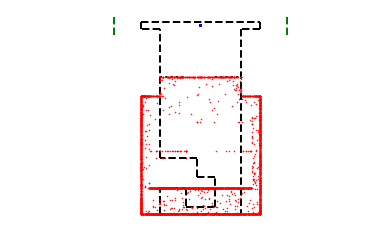

random_flat
emmc3_f_rgb


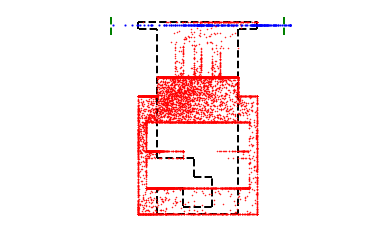

random_modular
emmc3_rmb


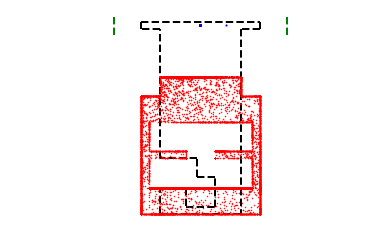

In [84]:
# Visualization of cart and agent final pos reached on 1 run
for m_name, m_id in zip(model_full_names,model_filenames):
    b_k = saves[m_id][0]
    print(b_k['parameters']['model_type'])
    print(m_id)
    #for i in range(nb_runs):
    #b_k = saves[m_id][i]
    #print(b_k['end_agent_x'][:10])
    plot_agent_pos_exploration(1, b_k['end_agent_x'],
                                   b_k['end_agent_z'],
                                   b_k['end_cart_x'])
    plt.show()
    
    

In [73]:
def get_nb_cells(x,y,nb_bins,rng):
    if y is not None: #2D case
        bin_numbers = sp.binned_statistic_2d(x, y, None, 'count',
                                                bins=nb_bins, range=rng).binnumber
    else: #1D case
        bin_numbers = sp.binned_statistic(x, None, 'count',
                                             bins=nb_bins, range=rng).binnumber
    return len(np.unique(bin_numbers))

# get env specific bounds
b = config.get_env_bounds('emmc_env')
nb_2d_cells = [10,30]
total_2d_cells = nb_2d_cells[0] * nb_2d_cells[1]
nb_c_cells = 30
nb_b_cells = 8

# Grid cell visualization
for m_id in model_filenames:
    stat[m_id]['agent_cells'] = []
    stat[m_id]['pickaxe_cells'] = []
    stat[m_id]['shovel_cells'] = []
    stat[m_id]['cart_cells'] = []
    stat[m_id]['b_combinations'] = []
    stat[m_id]['first_blocks'] = []
    stat[m_id]['first_swing_left'] = []
    stat[m_id]['first_swing_right'] = []
    stat[m_id]['first_cart_touched'] = []
    stat[m_id]['eval_cart_touched'] = []
    stat[m_id]['chosen_modules'] = []
def mean_std(data_name):
    mean = round(np.mean(stat[m_id][data_name]),3)
    std = round(np.std(stat[m_id][data_name]),3)
    return mean,std

name_2d_spaces = ['agent', 'pickaxe', 'shovel']
for m_name, m_id in zip(model_full_names,model_filenames):
    for i in range(nb_runs):
        b_k = saves[m_id][i]
        
        # grid cell for 2d outcome spaces (agent, pickaxe, shovel)
        for outc_space in name_2d_spaces:
            #print(outc_space+'_x')
            name = 'end_{}'.format(outc_space)
            bnd_x = b.get_bounds([outc_space+'_x'])
            bnd_z = b.get_bounds([outc_space+'_z'])
            bnds = bnd_x + bnd_z
            #print(bnds)
            nb_expl_cells = get_nb_cells(b_k[name+'_x'], b_k[name+'_z'],
                                         nb_2d_cells, bnds)
            stat[m_id][outc_space+'_cells'].append((nb_expl_cells/total_2d_cells)*100)
        
        #cart grid cell
        c_Xs = b_k['end_cart_x']
        nb_expl_cells = get_nb_cells(c_Xs, None,
                                     nb_c_cells, b.get_bounds(['cart_x']))
        stat[m_id]['cart_cells'].append((nb_expl_cells/nb_c_cells)*100)
        
        # first swing or touched car info
        try:
            first_cart_touched = next(x[0] for x in enumerate(c_Xs) if x[1] != 291.5)
        except StopIteration:
            first_cart_touched = 'never'
        # check for cart swing up
        try:
            first_swing_left = next(x[0] for x in enumerate(c_Xs) if x[1] > 296.2)
        except StopIteration:
            first_swing_left = 'never'
        try:
            first_swing_right = next(x[0] for x in enumerate(c_Xs) if x[1] < 286.8)
        except StopIteration:
            first_swing_right = 'never'
    
        
#         #blocks cell
#         first_blocks_found = []
#         for i in range(3):
#             try:
#                 first_found = nb_blocks.index(i)
#             except ValueError:
#                 first_found = 'never'
#             nb_found = nb_breads.count(float(i))
#             first_breads_found.append([first_found,nb_found])
#         #print( first_breads_found

#         final_bread_vec = np.zeros((len(bread_vec[0]),5))
#         #reconstruct original bread vectors
#         for bread_idx, v in enumerate(bread_vec):
#             for iter_idx in range(len(v)):
#                 final_bread_vec[iter_idx,bread_idx] = v[iter_idx]

#         b_explored_bins = len(np.unique(final_bread_vec,axis=0))
        
        

        
#         a_explored_bins, c_explored_bins, b_explored_bins, first_swing_left, first_swing_right, first_breads_found,\
#         first_cart_touched = get_grid_cell_exploration(b_k['end_agent_x'],
#                               b_k['end_agent_z'],
#                               b_k['end_cart_x'],
#                               b_k['end_bread_recovered'],
#                               [b_k['block_0'],b_k['block_1'],b_k['block_2']],
#                               c_bins=nb_c_cells,a_bins_x=nb_a_cells_x, a_bins_z=nb_a_cells_z, info=False)
#         stat[m_id]['agent_cells'].append((a_explored_bins/nb_a_cells)*100)
#         stat[m_id]['cart_cells'].append((c_explored_bins/nb_c_cells)*100)
#         stat[m_id]['b_combinations'].append((b_explored_bins/nb_b_cells)*100)
#         stat[m_id]['first_breads'].append(first_breads_found) 
        stat[m_id]['first_swing_left'].append(first_swing_left) 
        stat[m_id]['first_swing_right'].append(first_swing_right)
        stat[m_id]['first_cart_touched'].append(first_cart_touched)
        
print('--- EXPLORATION ---')
exploration_metrics = ['agent_cells', 'cart_cells', 'b_combinations',
                       'first_cart_touched', 'first_swing_left', 'first_swing_right']

for m_name, m_id in zip(model_full_names,model_filenames):
    print("#################### " + m_name + " ##################")
    
    for i in range(nb_runs):
        
        b_k = saves[m_id][i]
        a = np.array(b_k['choosen_modules'])
        unique, counts = np.unique(a, return_counts=True)
        #print dict(zip(unique, counts))
    
    for metric in exploration_metrics:
        values = stat[m_id][metric]
        if not 'first' in metric:
            mean,std = mean_std(metric)
            print(metric + ':' + '%s, MEAN: %s, STD: %s' % (values, mean, std))
        else:
            print(metric + ':' + '%s' % (values))

#     for i in range(6):
#         first_found = []
#         nb_found = []
#         for j in range(nb_runs):
#             first_found.append(stat[m_id]['first_breads'][j][i][0])
#             nb_found.append(stat[m_id]['first_breads'][j][i][1])
#         print('bread %s:' % i)
#         print("first found: %s" % first_found)
#         print("nb_found: %s" % nb_found)   


/home/remy/.local/lib/python3.5/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


--- EXPLORATION ---
#################### Flat Random Goal Babbling ##################
agent_cells:[67.33333333333333, 61.66666666666667, 58.333333333333336, 66.33333333333333, 61.0], MEAN: 62.933, STD: 3.389
cart_cells:[83.33333333333334, 16.666666666666664, 6.666666666666667, 63.33333333333333, 23.333333333333332], MEAN: 38.667, STD: 29.484
b_combinations:[], MEAN: nan, STD: nan
first_cart_touched:[4837, 10925, 18756, 5053, 12201]
first_swing_left:['never', 'never', 'never', 'never', 'never']
first_swing_right:[6330, 'never', 'never', 'never', 'never']
#################### Random Model Babbling ##################
agent_cells:[53.666666666666664, 66.66666666666666, 66.66666666666666, 66.66666666666666, 65.33333333333333], MEAN: 63.8, STD: 5.093
cart_cells:[6.666666666666667, 46.666666666666664, 46.666666666666664, 46.666666666666664, 83.33333333333334], MEAN: 46.0, STD: 24.258
b_combinations:[], MEAN: nan, STD: nan
first_cart_touched:[14000, 6252, 6252, 6252, 4184]
first_swing_left:['n

/home/remy/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/remy/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/remy/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/remy/.local/lib/python3.5/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/remy/.local/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [74]:
# Grid cell exploration curves
nb_steps = int(nb_episodes / 100)
print('ploting using {} steps'.format(nb_steps))
all_a_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
all_c_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
all_b_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
name_2d_spaces = ['agent']
for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
    print(m_name)
    for i in range(nb_runs):
        b_k = saves[m_id][i]
        a_explo = [0.]
        c_explo = [0.]
        b_explo = [0.]
        for max_episodes in np.arange(100,nb_episodes+100,100):
            
            for outc_space in name_2d_spaces:
                #print(outc_space+'_x')
                name = 'end_{}'.format(outc_space)
                bnd_x = b.get_bounds([outc_space+'_x'])
                bnd_z = b.get_bounds([outc_space+'_z'])
                bnds = bnd_x + bnd_z
                Xs = b_k[name+'_x'][:max_episodes]
                Zs = b_k[name+'_z'][:max_episodes]
                a_expl_cells = get_nb_cells(Xs, Zs, nb_2d_cells, bnds)
            
        
            #cart grid cell
            c_Xs = b_k['end_cart_x'][:max_episodes]
            c_expl_cells = get_nb_cells(c_Xs, None,
                                         nb_c_cells, b.get_bounds(['cart_x']))
            
            
            a_explo.append((a_expl_cells/total_2d_cells)*100)
            
            c_explo.append((c_expl_cells/nb_c_cells)*100)
            #b_explo.append((b_explored_bins/nb_b_cells)*100)
        all_a_explo[m_nb,i,:] = a_explo
        all_c_explo[m_nb,i,:] = c_explo
        #all_b_explo[m_nb,i,:] = b_explo
        
#print np.sum(all_a_explo,axis=1).shape
#print np.mean(np.sum(all_a_explo,axis=1),axis=0).shape
#break
colors = ['red','blue','green','magenta','black','cyan','orange']
mean_a_explo = np.mean(all_a_explo,axis=1)
#mean_b_explo = np.mean(all_b_explo,axis=1)
mean_c_explo = np.mean(all_c_explo,axis=1)

std_a_explo = np.std(all_a_explo,axis=1)
#std_b_explo = np.std(all_b_explo,axis=1)
std_c_explo = np.std(all_c_explo,axis=1)

ploting using 200 steps
Flat Random Goal Babbling


/home/remy/.local/lib/python3.5/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


Random Model Babbling
Active Model Babbling


agent exploration
3.388870673903686
5.092914467942473
6.1982076262237165


/home/remy/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/remy/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:3461: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


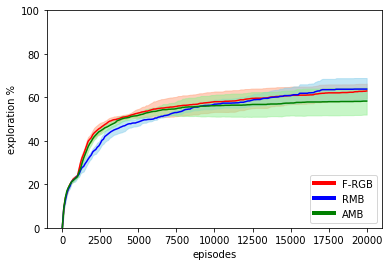

cart
29.484459183327978
24.257873864880338
28.596814119369625


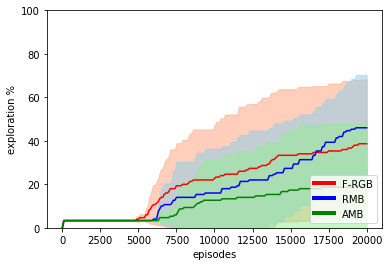

NameError: name 'mean_b_explo' is not defined

In [78]:
def plot_with_std(x,y,err,color,shade_color,label,y_min,y_max):
    plt.plot(x,y, color=color, label=label,linewidth=1.5)
    plt.fill_between(x,y-err,y+err,color=shade_color,alpha=0.5)
    leg = plt.legend(loc='lower right')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
    plt.xlabel('episodes')
    plt.ylabel('exploration %')
    if y_min is not None:
        plt.ylim(ymin=y_min,ymax=y_max)
    

labels = ['F-RGB','RMB','AMB']
shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
print("agent exploration")
x = np.arange(0,nb_episodes+100,100)
for i in range(nb_models):
    print(std_a_explo[i,-1])
    y = mean_a_explo[i,:]
    err = std_a_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("cart")
for i in range(nb_models):
    print(std_c_explo[i,-1])
    y = mean_c_explo[i,:]
    err = std_c_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_cart_pos_expl.pdf", bbox_inches='tight')
plt.show()

#print "bread"
for i in range(nb_models):
    y = mean_b_explo[i,:]
    err = std_b_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_bread_pos_expl.pdf", bbox_inches='tight')
plt.show()
#plt.plot(mean_a_explo, color='red', label=m_name.replace('_',' '))
#plt.plot(mean_c_explo, color='blue', label=m_name.replace('_',' '))
#plt.plot(mean_b_explo, color='green', label=m_name.replace('_',' '))
        

agent_end_pos
cart_end_pos
mined_blocks
pickaxe_end_pos
shovel_end_pos
agent_end_pos
cart_end_pos
mined_blocks
pickaxe_end_pos
shovel_end_pos
agent_end_pos
cart_end_pos
mined_blocks
pickaxe_end_pos
shovel_end_pos
agent_end_pos
cart_end_pos
mined_blocks
pickaxe_end_pos
shovel_end_pos
agent_end_pos
cart_end_pos
mined_blocks
pickaxe_end_pos
shovel_end_pos


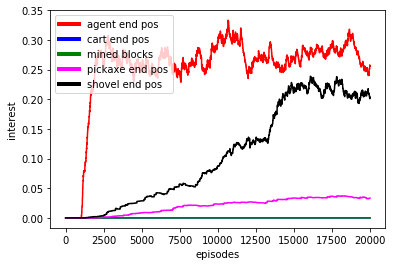

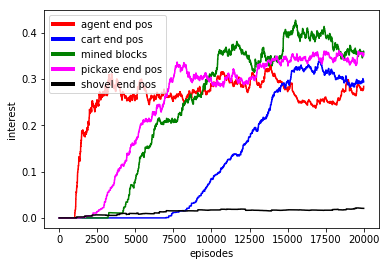

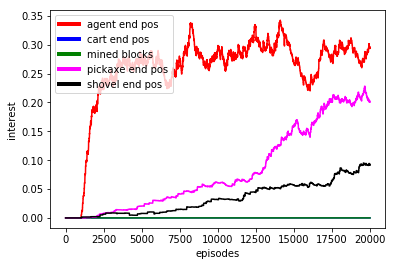

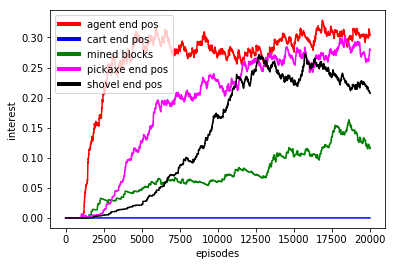

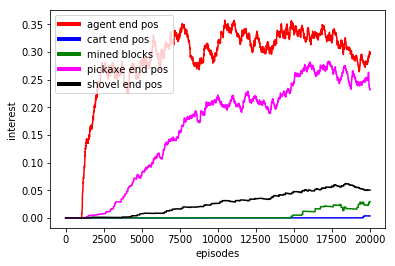

In [80]:
def plot_interests(fig_id,interest_dict, legend=True, labels=None):
    colors = ['red','blue','green','magenta','black','cyan','orange']
    plt.figure(fig_id)
    for i,(name,interests) in enumerate(sorted(interest_dict.items())):
        print(name)
        if labels is not None:
            plt.plot(interests, color=colors[i], label=labels[i],linewidth=1.5)
        else:
            plt.plot(interests, color=colors[i], label=name.replace('_',' '),linewidth=1.5)
    plt.xlabel('episodes')
    plt.ylabel('interest')
    if legend:
        leg = plt.legend(loc='upper left')
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)

short_labels = ['agent','bread','cart','distr 1','distr 2','distr 3', 'distr 4']

# Plot interest curves:

for i in range(nb_runs):
    ints = saves[model_filenames[2]][i]['interests']
    plot_interests(i, ints,legend=True,labels=None)
    #plt.savefig("d_legends_interests_"+str(i)+".pdf", bbox_inches='tight')


In [ ]:
# get interest curves names:
labels_2 = [s.replace('_',' ') for s in np.unique(saves[model_filenames[3]][0]['choosen_modules'])]

labels = ['agent final position','bread final count','cart final position',
               'fixed distractor 1 final position','fixed distractor 2 final position','moving distractor 1 final position', 'moving distractor 2 final position']
colors = ['red','blue','green','magenta','black','cyan','orange']

fig = pylab.figure()
figlegend = pylab.figure(figsize=(3.5,2))
ax = fig.add_subplot(111)
line_data = []
#for i in range(len(labels)):
#    line_data.append([range(10), pylab.randn(10), colors[i]])
print len(labels_2)
if len(labels_2) == 3:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2])
elif len(labels_2) == 7:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2],
                    range(10),pylab.randn(10),colors[3],
                    range(10),pylab.randn(10),colors[4],
                    range(10),pylab.randn(10),colors[5],
                    range(10),pylab.randn(10),colors[6])
    
leg = figlegend.legend(lines, labels[:len(labels_2)], 'center')
for legobj in leg.legendHandles:
            legobj.set_linewidth(6.0)
        
figlegend.show()
figlegend.savefig('legend.pdf')

In [ ]:
print len()


